In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import pandas as pd 
from fbprophet import Prophet
from tqdm import tqdm

In [2]:
data = np.load('/home/v-tyan/tsf_ideas_real/data/shunfeng/dataset.npz')

In [3]:
data.files

['node_day',
 'node_hour',
 'node_label',
 'label_node_mask',
 'edge_index',
 'edge_attr',
 'label_date',
 'node_zonecode',
 'node_day_col',
 'node_hour_col',
 'edge_col']

In [4]:
delivery = data['node_day'][:, :, 3]

In [5]:
delivery.shape

(12322, 425)

In [6]:
date = data['label_date']

In [34]:
data['node_day_col']

array(['outflow_transfer_volume', 'inflow_user_volume',
       'inflow_transfer_volume', 'outflow_delivery_volume',
       'outflow_delivery_success', 'inflow_lastzone_volume',
       'delivey_avg_tm', 'inflow_total_volume', 'outflow_total_volume',
       'outflow_delivery_label', 'new_delivery_avg_tm',
       'receive_holiday_effect', 'deliver_holiday_effect',
       'delivery_label', 'month', 'day', 'weekday'], dtype='<U24')

In [7]:
delivery = delivery[[0 not in d for d in delivery]]

In [8]:
delivery.shape 

(8546, 425)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


([<matplotlib.axis.XTick at 0x7f92d252c7d0>,
 [Text(0, 0, ''), Text(0, 0, '')])

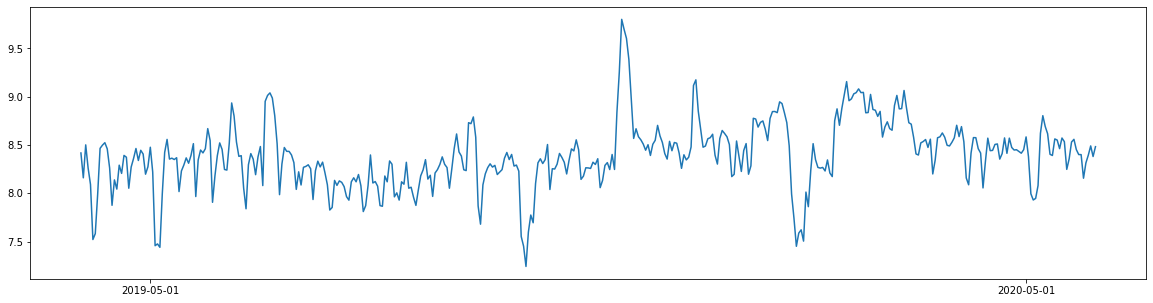

In [9]:
plt.figure(figsize=(20,5))
# fig, ax = plt.subplots(figsize=(20, 5))
# ax.plot(date, delivery[400])
# ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.plot(date, delivery[423])
plt.xticks(['2019-05-01', '2020-05-01'])

In [12]:
holidays = {
    '2019-04-05': 0,  # 清明
    '2020-04-04': 0, 
    '2019-05-01': 1,  # 劳动节
    '2020-05-01': 1, 
    '2019-06-07': 2,  # 端午节
    '2019-09-13': 3,  # 中秋节
    '2019-10-01': 4,  # 国庆节
    '2020-01-01': 5,  # 元旦
    '2020-01-25': 6,  # 春节
    '2019-06-18': 7,  # 618
    '2019-11-11': 8,  # 双11
}

In [11]:
date[[1, -1]]

array(['2019-04-03', '2020-05-30'], dtype='<U10')

In [42]:
holiday = np.zeros((425, 9)).astype('float')

In [43]:
for idx, d in enumerate(date):
    if d in holidays:
        holiday[idx, holidays[d]] = 1

In [45]:
for h in range(9):
    idx = 0
    while idx < 425:
        if holiday[idx, h] > 0.5:
            print(idx)
            holiday[max(idx - 10, 0):min(idx + 10, 425), h] = \
                np.arange(max(idx - 10, 0) - idx, min(idx + 10, 425) - idx)
            idx = min(idx + 10, 425)
        else:
            idx += 1

3
368
29
395
66
164
182
274
298
77
223


In [78]:
holiday[:-1] = holiday[1:]

In [54]:
delivery = delivery[:, :, np.newaxis]

In [55]:
delivery.shape

(8546, 425, 1)

In [51]:
holiday = np.tile(holiday, [8546, 1, 1])

In [52]:
holiday.shape

(8546, 425, 9)

In [56]:
data = np.concatenate((delivery, holiday), axis=2)

In [58]:
data.shape

(8546, 425, 10)

In [82]:
holiday[:, 28]

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
np.save('/home/v-tyan/tsf_ideas_real/data/shunfeng/data', data)

In [84]:
np.save('/home/v-tyan/tsf_ideas_real/data/shunfeng/holiday', holiday)

In [5]:
delivery = np.load('/home/v-tyan/tsf_ideas_real/data/shunfeng/delivery.npy')


In [6]:
holiday = np.load('/home/v-tyan/tsf_ideas_real/data/shunfeng/holiday.npy')

In [7]:
delivery.shape

(8546, 425)

In [8]:
holiday.shape

(8546, 425)

In [9]:
holiday[:, 1:] = holiday[:, :-1]

In [26]:
labor_days = pd.DataFrame({
    'holiday': 'labor_day',
    'ds': pd.to_datetime(['2019-05-01', '2020-05-01']), 
    'lower_window': -1, 
    'upper_window': 5, 
})

In [51]:
forecasts = np.zeros((50, 85))

for idx in tqdm(range(50)):
    for predict_point in range(340, 425):
        m = Prophet(holidays=labor_days)
        df = pd.DataFrame({'ds': pd.date_range('2019-04-02', periods=predict_point), 'y': delivery[idx, :predict_point]})
        m.fit(df)
        future = m.make_future_dataframe(periods=1)
        forecast = m.predict(future)
        fc = forecast['yhat'].iloc[predict_point]
        forecasts[idx, predict_point - 340] = fc
    # forecasts.append(np.array(forecast['yhat'].iloc[340:]))

ily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/anaconda/envs/py37_default/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disablin

KeyboardInterrupt: 

In [49]:
forecast['yhat'].iloc[0]

9.114676660809414

In [63]:
forecasts[16]

array([8.13148179, 7.83260416, 7.56381493, 8.29870668, 8.22525122,
       8.35507104, 8.3360583 , 8.24826062, 7.95587455, 7.65624277,
       8.36501708, 8.27297813, 8.39735907, 8.38494335, 8.29949576,
       8.0007644 , 7.70008291, 8.40201155, 8.31361639, 8.44466319,
       8.42535929, 8.33769636, 8.0442221 , 7.74184377, 8.4396888 ,
       8.34928436, 8.47133522, 8.44854288, 8.36029467, 8.07846444,
       7.77123277, 8.46485584, 8.36324204, 8.47192019, 8.45634062,
       8.36877604, 8.08463754, 7.77755217, 8.46607331, 8.37295954,
       8.50534811, 8.48296434, 8.39681044, 8.10643588, 7.7840433 ,
       8.47355045, 8.37812457, 8.5057203 , 8.48289987, 8.39935119,
       8.1152034 , 7.79410391, 8.4644604 , 8.39216011, 8.51485292,
       8.49279038, 8.40437807, 8.11384359, 7.78240301, 8.41411209,
       8.33044089, 8.44387844, 8.43196553, 8.34328358, 8.05488636,
       7.74094691, 8.38642389, 8.32272395, 8.45590714, 8.45012604,
       8.3596922 , 8.07357988, 7.74290859, 8.37702841, 8.31599

In [39]:
forecasts = np.array(forecasts)

In [41]:
forecasts.shape

(50, 85)

In [64]:
labels = delivery[:16, 340:]

In [45]:
labels.shape

(50, 85)

In [65]:
np.mean(np.abs(labels - forecasts[:16]))

0.18974770085853382